## Distribución Normal

La función de distribución normal es la función base para el análisis de diferentes problemas y planteamiento de modelos en los que la inferencia bayesiana también se puede incluir. Gracias al teorema del límite central, muchas distribuciones se pueden expresar con ayuda de lo parámetros de esta distribución permitendo simplificar algunos problemas al plantearlos directamente con los parámetros de la distribución normal.


Definida previamente la función de densidad  es igual a:


$$p(y\mid \theta, \sigma^{2})=\frac{1}{\sqrt{2 \pi \sigma^{2}}}e^{-\frac{1}{2}(\frac{y-\theta}{\sigma})^{2}}$$



* Esto se define para un intervalo $-\infty < y< \infty$
* Se asume en este caso que se conoce la varianza $\sigma^{2}$
* El parámetro que se pretende analizar es la media representado por $\theta$


Usando multiples observaciones se obtiene la versión likelihood de la distribución:


\begin{align}
p(y_{1},...,y_{n}\mid \theta, \sigma^{2}) &= \prod_{i=1}^{n} p(y_{i}\mid \theta, \sigma^{2}) & \\
&\propto \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi \sigma^{2}}} e^{-\frac{1}{2}(\frac{(y-\theta}{\sigma})^{2}}  & \\
&= (2\pi \sigma^{2})^{-n/2}exp\Big\{-\frac{1}{2}\sum \Big(\frac{y_{i}-\theta}{\sigma}\Big)^{2}\Big\}
\end{align}


Dado que $\theta$ depende de las observaciones y de $\sigma^{2}$, se asume que $p(\theta \mid \sigma^{2})$ se distribuye de forma normal y $y_{1},...,y_{n}$ es tambien iid $N(\theta,\sigma^{2})$, por lo tanto $p(\theta \mid y_{1},...,y_{n})$ se distribuye también de forma normal.


Para $\theta \sim N(\mu_{0}, \tau_{0}^{2})$

\begin{align}
p(\theta \mid y_{1},...,y_{n},\sigma^{2}) &= p(\theta \mid \sigma^{2})p(y_{1},...,y_{n}\mid \theta, \sigma^{2})/p(y_{1},...,y_{n}\mid  \sigma^{2}) & \\
&\propto p(\theta \mid \sigma^{2})p(y_{1},...,y_{n}\mid \theta, \sigma^{2})  & \\
&\propto exp\{-\frac{1}{\tau_{0}^{2}}(\theta-\mu_{0})^{2})\}exp\{-\frac{1}{2\sigma^{2}}\sum (y_{i}-\theta)^{2} \}
\end{align}

Donde $p(\theta \mid \sigma^{2})$ es la información a priori y $\tau_{0}$ y $\mu_{0}$ son los hiperparámetros de la distribución a priori.

El cálculo para obtener la distribución posterior se puede lograr de tal forma que se obtenga una ecuación estandarizada $z=\frac{x-\mu}{\sigma}$, facilitando la implementación del modelo cuando se conoce la varianza.

Primero  se trasnforman las variables para el cálculo final es:

$$ a=\frac{1}{\tau_{0}^{2}}+\frac{n}{\sigma^{2}}, \quad b=\frac{\mu_{0}}{\tau_{0}^{2}}+\frac{\sum y_{i}}{\sigma^{2}}$$

y $c=c(\mu_{0},\tau_{0}^{2},\sigma^{2},y_{1},...,y_{n})$ que se puede dejar a un lado daddo que $\theta$ no depende de su cálculo

Simplificando se tiene que 


\begin{align}
p(\theta \mid y_{1},...,y_{n},\sigma^{2}) &\propto exp\{-\frac{1}{2}(a\theta^{2}-2b\theta)\} & \\
&= exp\{-\frac{1}{2}a(\theta^{2}-2b\theta/a+b^{2}/a^{2})\} & \\
&\propto exp\{-\frac{1}{2}a(\theta-b/a)^{2})\}& \\
&= exp\Big\{-\frac{1}{2}\Big(\frac{\theta- b/a}{1/\sqrt{a}}\Big)\Big\}
\end{align}


Como se puede observar la distribución posterior toma la forma de una densidad normal en donde los parámetros de la distribución posterior son:

$$ \tau^{2}_{n}=\frac{1}{a} \quad y \quad \mu_{n}=\frac{b}{a}$$

La presición del modelo, se mide con ayuda de la varianza en sus diferentes formas. Es asi que se tienen tres formas de medir la presición del parámetro $\theta$:


* $\tilde{\sigma}^{2}=1/\sigma^{2}$ Presición de la muestra.
* $\tilde{\tau}_{0}^{2}=1/\tau_{0}^{2}$ Precisión de la prior.
* $ \tilde{\tau}_{n}^{2}=1/\tau_{n}^{2}$ Precisión de la posterior.

Finalmente usando $\kappa_{0}$ como la información prior de la muestra que se ha utilizado en experimentos similares, se dice que la varianza y la media posterior son iguales a:


*  Varianza $\tau_{n}^{2}=\tau_{0}^{2}+n\sigma^{2}$.
* Media $\mu_{n}=\frac{\kappa_{0}}{\kappa_{0}+n}\mu_{0}+\frac{n}{\kappa_{0}+n}\overline{y}$. 

Domde la media es una ponderación de la información a priori y la información promedio que ofrecen los datos. 


Finalmente, el valor esperado y la varianza de la predición $\tilde{Y}\mid y$ es igual a:


* $E[\tilde{Y}\mid y, \sigma^{2}]=\mu_{n}$.
* $V[\tilde{Y}\mid y, \sigma^{2}]=\tau_{n}^{2}+\sigma^{2}$.




### Ejemplo

La pandemia que afectó a Colombia entre 2020 y 2021 tuvo un efecto en las unidades de cuidados intensivos UCI, en Bogotá se instalaron en promedio 500 camas, en Medellín 320 camas y en Cali 200 camas. Este número podía variar dado que además de las camas se necesita de personal médico capacitado  de acuerdo al aumento de contagios.


La principal preocupación de las autoridades es el tiempo promedio que dura una persona en una UCI. Para determinar el tiempo en el que una cama se puede despejar, se realizó un estudio tomando las camas de algunos hospitales en cada una de estas ciudades, en donde la variable es número de camas ocupadas en cada hospital. Analice de forma separada la información de cada una de las ciudades con una distribución posterior conjugada usando como información inicial, $\mu_{0}=15,\sigma^{2}_{0}=8,\kappa_{0}=1$ .


a) Calcule la media posterior $\mu_{n}$, $\tau_{n}^{2}$ y los intervalos al 95% de cada ciudad.

b) Grafique cada una de las ditribuciones en cada ciudad.

c) Genere la predicción para cada ciudad.



In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import scipy.stats as st
### Camas UCI ocupadas por hospital en cada Ciudad
BOG=np.array([21,13,25,30,12,16,17,18,30,20,21,23,23,30,12,18,22,17,15,20,23,16,12,11,16])
MED=np.array([11,15,20,13,11,16,19,8,23,22,24,14,18,17,13,12,18,15,17,21,13])
CAL=np.array([14,18,12,15,18,22,23,18,25,19,21,19,22,25,23,14,19,13,16])
mu0=15
sigma2=4
kappa0=1
tau02=(15/2)**2

mediaBOG=np.mean(BOG)
bBog=(1/tau02)*mu0+(len(BOG)/sigma2)*mediaBOG
aBog=(1/tau02)+(len(BOG)/sigma2)
munBOG=bBog/aBog
tau2nBOG=1/aBog
interInfBOG=munBOG+st.norm.ppf(.025)*math.sqrt(1/aBog)
interSupBOG=munBOG+st.norm.ppf(.975)*math.sqrt(1/aBog)


mediaMED=np.mean(MED)
bMED=(1/tau02)*mu0+(len(MED)/sigma2)*mediaMED
aMED=(1/tau02)+(len(MED)/sigma2)
munMED=bMED/aMED
tau2nMED=1/aMED
interInfMED=munMED+st.norm.ppf(.025)*math.sqrt(1/aMED)
interSupMED=munMED+st.norm.ppf(.975)*math.sqrt(1/aMED)



mediaCAL=np.mean(CAL)
bCAL=(1/tau02)*mu0+(len(CAL)/sigma2)*mediaCAL
aCAL=(1/tau02)+(len(CAL)/sigma2)
munCAL=bCAL/aCAL
tau2nCAL=1/aCAL
interInfCAL=munCAL+st.norm.ppf(.025)*math.sqrt(1/aCAL)
interSupCAL=munCAL+st.norm.ppf(.975)*math.sqrt(1/aCAL)


data = {'Bogotá': [munBOG, tau2nBOG, interInfBOG , interSupBOG, munBOG/500], 'Medellín': [munMED, tau2nMED, interInfMED, interSupMED,munMED/320], 'Cali': [munCAL, tau2nCAL, interInfCAL, interSupCAL,munCAL/200]}  
   
df = pd.DataFrame(data)  

df.index=["Media $\mu_{n}$"," Varianza $\tau_{n}$", "2.5%", "97.5%","Ocupación" ]
df

,Bogotá,Medellín,Cali
Media $\mu_{n}$,19.227974,16.186459,18.722908
Varianza $\tau_{n}$,0.159546,0.189833,0.209741
2.5%,18.445101,15.332505,17.825293
97.5%,20.010847,17.040412,19.620523
Ocupación,0.038456,0.050583,0.093615


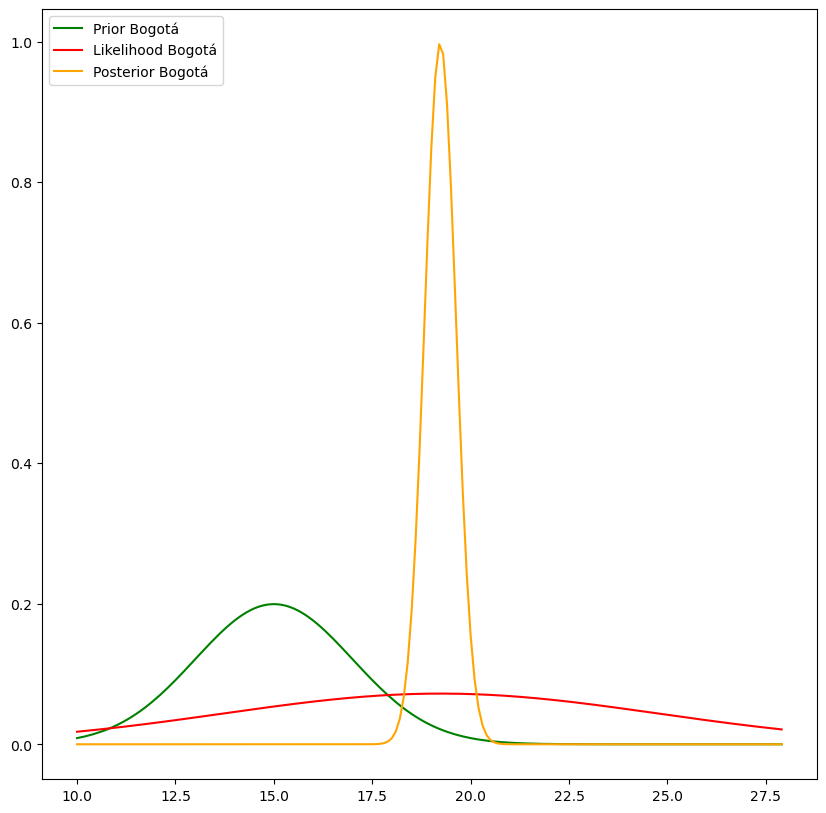

In [3]:
from scipy.stats import norm
theta = np.arange(10, 28, 0.1).tolist() 

varBOG=np.var(BOG)

# list of pmf values
BOGprior = [norm.pdf(r, mu0, math.sqrt(sigma2)) for r in theta ]
BOGlik= [norm.pdf(r, mediaBOG, math.sqrt(varBOG)) for r in theta ]
BOGpost=[norm.pdf(r, munBOG, math.sqrt(tau2nBOG)) for r in theta ]

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(theta,BOGprior, color = 'green', label = 'Prior Bogotá')
ax.plot(theta,BOGlik, color = 'red', label = 'Likelihood Bogotá')
ax.plot(theta,BOGpost, color = 'orange', label = 'Posterior Bogotá')
ax.legend(loc = 'upper left')


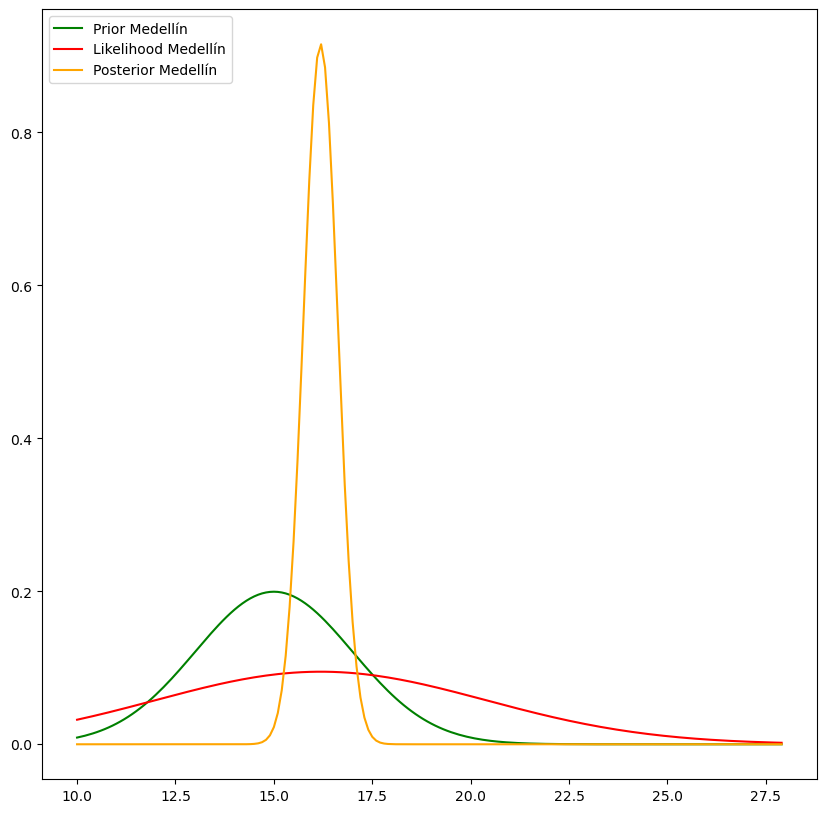

In [4]:
from scipy.stats import norm
theta = np.arange(10, 28, 0.1).tolist() 

varMED=np.var(MED)

# list of pmf values
MEDprior = [norm.pdf(r, mu0, math.sqrt(sigma2)) for r in theta ]
MEDlik= [norm.pdf(r, mediaMED, math.sqrt(varMED)) for r in theta ]
MEDpost=[norm.pdf(r, munMED, math.sqrt(tau2nMED)) for r in theta ]

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(theta, MEDprior, color = 'green', label = 'Prior Medellín')
ax.plot(theta, MEDlik, color = 'red', label = 'Likelihood Medellín')
ax.plot(theta,MEDpost, color = 'orange', label = 'Posterior Medellín')
ax.legend(loc = 'upper left')

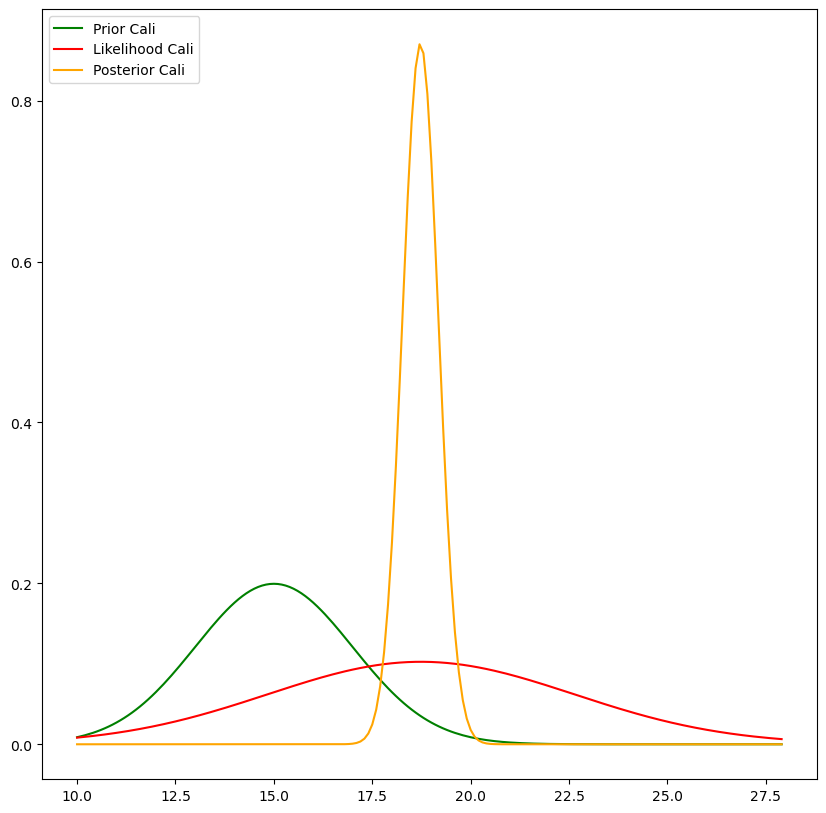

In [5]:
from scipy.stats import norm
theta = np.arange(10, 28, 0.1).tolist() 

varCAL=np.var(CAL)

# list of pmf values
CALprior = [norm.pdf(r, mu0, math.sqrt(sigma2)) for r in theta ]
CALlik= [norm.pdf(r, mediaCAL, math.sqrt(varCAL)) for r in theta ]
CALpost=[norm.pdf(r, munCAL, math.sqrt(tau2nCAL)) for r in theta ]

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(theta, CALprior, color = 'green', label = 'Prior Cali')
ax.plot(theta, CALlik, color = 'red', label = 'Likelihood Cali')
ax.plot(theta,CALpost, color = 'orange', label = 'Posterior Cali')
ax.legend(loc = 'upper left')

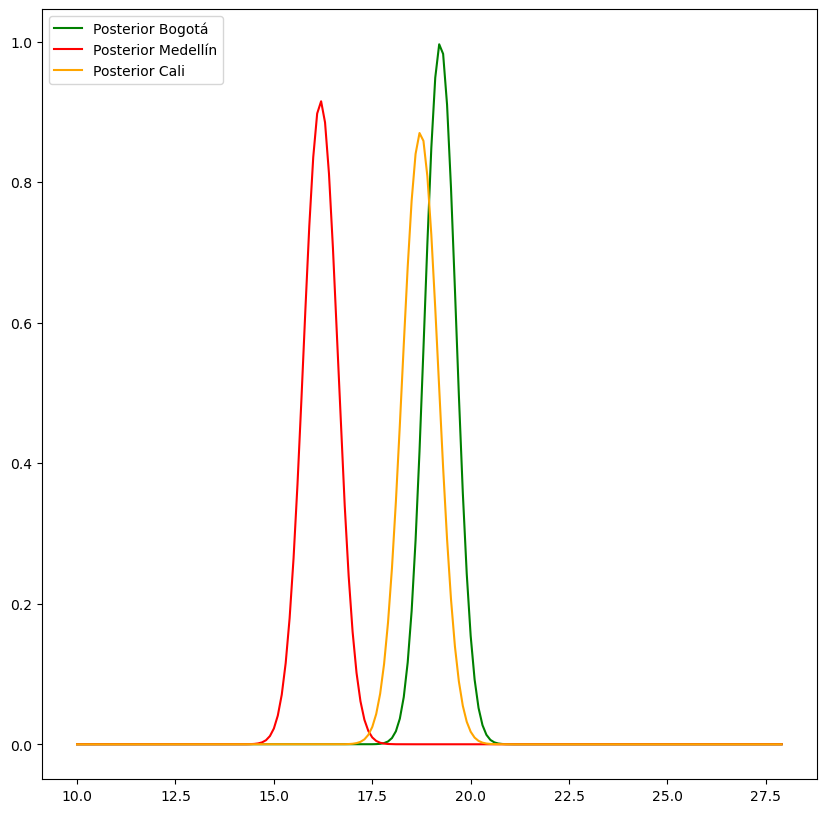

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(theta, BOGpost, color = 'green', label = 'Posterior Bogotá')
ax.plot(theta, MEDpost, color = 'red', label = 'Posterior Medellín')
ax.plot(theta,CALpost, color = 'orange', label = 'Posterior Cali')
ax.legend(loc = 'upper left')

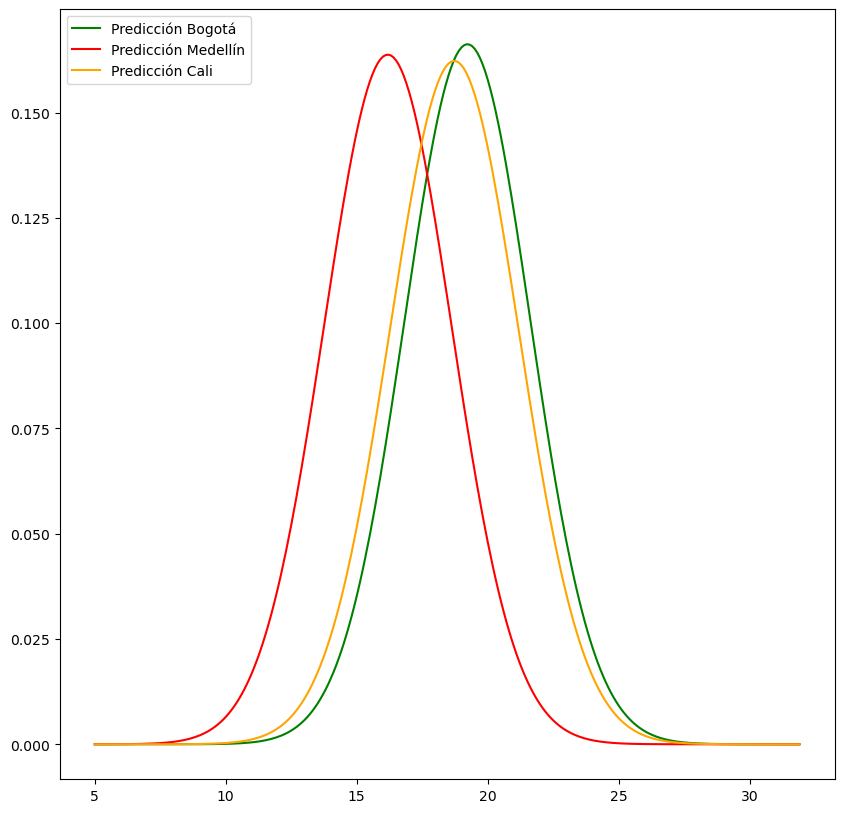

In [7]:
## Generamos la predicción de cada ciudad usando el mismo sigma para todos.
theta = np.arange(5, 32, 0.1).tolist()
predBOG=[norm.pdf(r, munBOG, math.sqrt(tau2nBOG)+math.sqrt(sigma2)) for r in theta ]
predMED=[norm.pdf(r, munMED, math.sqrt(tau2nMED)+math.sqrt(sigma2)) for r in theta ]
predCAL=[norm.pdf(r, munCAL, math.sqrt(tau2nCAL)+math.sqrt(sigma2)) for r in theta ]

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(theta, predBOG, color = 'green', label = 'Predicción Bogotá')
ax.plot(theta, predMED, color = 'red', label = 'Predicción Medellín')
ax.plot(theta,predCAL, color = 'orange', label = 'Predicción Cali')
ax.legend(loc = 'upper left')


La predicción nos dice que es más probable que Medellín disminuya la ocupación de UCI en cada hospital que Bogotá y Cali, y también, es más probable que en Bogotá el nivel de ocupación aumente en comparación con Cali.

### Inferencia conjunta para media y varianza.

El otro caso en la distribución normal ocurre cuando la varianza $\sigma^{2}$ es desconocida y por lo tanto se debe calcular antes de obtener el parámetro $\theta$. 

Usando el axioma de que el producto de una probabilidad condicional y una probabilidad marginal resultan en una distribución conjunta para dos parámetros, se puede expresar $\theta$ y $\sigma^{2}$ de la siguiente forma:


$$p(\theta,\sigma^{2})=p(\theta \mid \sigma^{2})p(\sigma^{2})$$


En el proceso de inferencia, $\tau_{0}^{2}=\sigma^{2}/n \equiv \sigma^{2}/\kappa_{0}$  En donde $\mu_{0}$ y $\kappa_{0}$ son la media y el tamaño de la muestra a priori. 


Para encontrar un $\sigma^{2}$ apropopiado que se pueda reemplazar en la distribución prior y en la disrtribución likelihhod, esta debe cumplir la norma de ser positiva. La distribución asociada a la varianza es la distribución gamma, solo que en este caso, mientras que la distribución gamma ofrece la precisión, la distribución inversa de la gamma  genera la varianza que es desconocida.


$$ 1/\sigma^{2} \sim gamma(a,b)$$

$$ \sigma^{2} \sim  inverse-gamma(a,b)$$


Reparametrizando $a,b$ , esta se obtiene de forma prior como 

$$ 1/\sigma^{2} \sim gamma(\frac{\nu_{0}}{2},\frac{\nu_{0}}{2}\sigma^{2}_{0})$$


Donde $\sigma^{2}_{0}$ es un hiperparámetro como los que se usaron anteriormente para calcular $\theta$ con varianza conocida.

Las medidas básicas de esta distribución prior son:

* $E[\sigma^{2}]=\sigma^{2}_{0}\frac{\nu_{0}/2}{\nu_{0}/2-1}$;
* $mode[\sigma^{2}]=\sigma^{2}_{0}\frac{\nu_{0}/2}{\nu_{0}/2+1}$;
* $V[\sigma^{2}]$ decrese en $\nu_{0}$

Donde los parámetros prior $(\sigma^{2}, \nu_{0})$ son la varianza de la muestra y el tamaño de las observaciones prior. 


Usando esta información $\{\theta \mid y, \sigma^{2}\}\sim N(\mu_{n},\sigma^{2}/\kappa_{n})$ 

Donde $\kappa_{n}=\kappa_{0}+n$ 

$$\mu_{n}=\frac{(\kappa_{0}/\sigma^{2})\mu_{0}+(n/\sigma^{2})\overline{y}}{\kappa_{0}/\sigma^{2}+n/\sigma^{2}}=\frac{\kappa_{0}\mu_{0}+n\overline{y}}{\kappa_{n}}$$


Dado lo anterior, se debe calcular la distrobución posterior para $\sigma^{2}$ que se obtiene integrando sobre $\theta$.

$$p(\sigma^{2}\mid y) \propto p(\sigma^{2})p(y\mid \sigma^{2})$$

El resultado de este proceso es igual a:

$$\{1/\sigma^{2} \mid y\} \sim gamma(\nu_{n}/2, \nu_{n}\sigma^{2}_{n}/2)$$

Con $\nu_{n}=\nu_{0}+n$ y $\sigma_{n}^{2}=\frac{1}{\nu_{n}}[\nu_{0}\sigma^{2}_{0}+(n-1)s^{2}+\frac{\kappa_{0}n}{\kappa_{n}}(\overline{y}-\mu_{0})^{2}]$



### Ejemplo

Usando el ejercicio anterior, pero incluyendo una nueva variable prior $\nu_{0}=2$. Se realizará nuevamente el proceso haciendo el proceso de inferencia sobre $\sigma^{2}$.

En este ejercicio usaremos la distribución log normal y log inverse gamma para obtener la distribución marginal y conjunta de $\sigma^{2}$ y $\theta$. 

En este ejercicio se presenta primero una gráfica de contorno, que muestra la relación entre la varianza y la media de la distribución normal.

Segundo, el restultado de  la distribución posterior para cada una de las ciudades que se usaron en el ejemplo anterior.

In [8]:
from scipy.stats import gamma
### Camas UCI ocupadas por hospital en cada Ciudad
BOG=np.array([21,13,25,30,12,16,17,18,30,20,21,23,23,30,12,18,22,17,15,20,23,16,12,11,16])
MED=np.array([11,15,20,13,11,16,19,8,23,22,24,14,18,17,13,12,18,15,17,21,13])
CAL=np.array([14,18,12,15,18,22,23,18,25,19,21,19,22,25,23,14,19,13,16])
mu0=15
sigma20=4
kappa0=1
nu0=2
mediaBOG=np.mean(BOG)
varBOG=np.var(BOG)
kappanBOG= kappa0 + len(BOG)
nunBOG = nu0 + len(BOG)
munBOG=(kappa0*mu0+len(BOG)*mediaBOG)/kappanBOG
s2nBOG = (1 / nunBOG) * (nu0 * sigma20 + (len(BOG) - 1) * varBOG + (kappa0 * len(BOG)  * (mediaBOG - mu0)**2)/ kappanBOG)

/Users/andresmartinez/anaconda3/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:1870: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/andresmartinez/anaconda3/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:1870: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


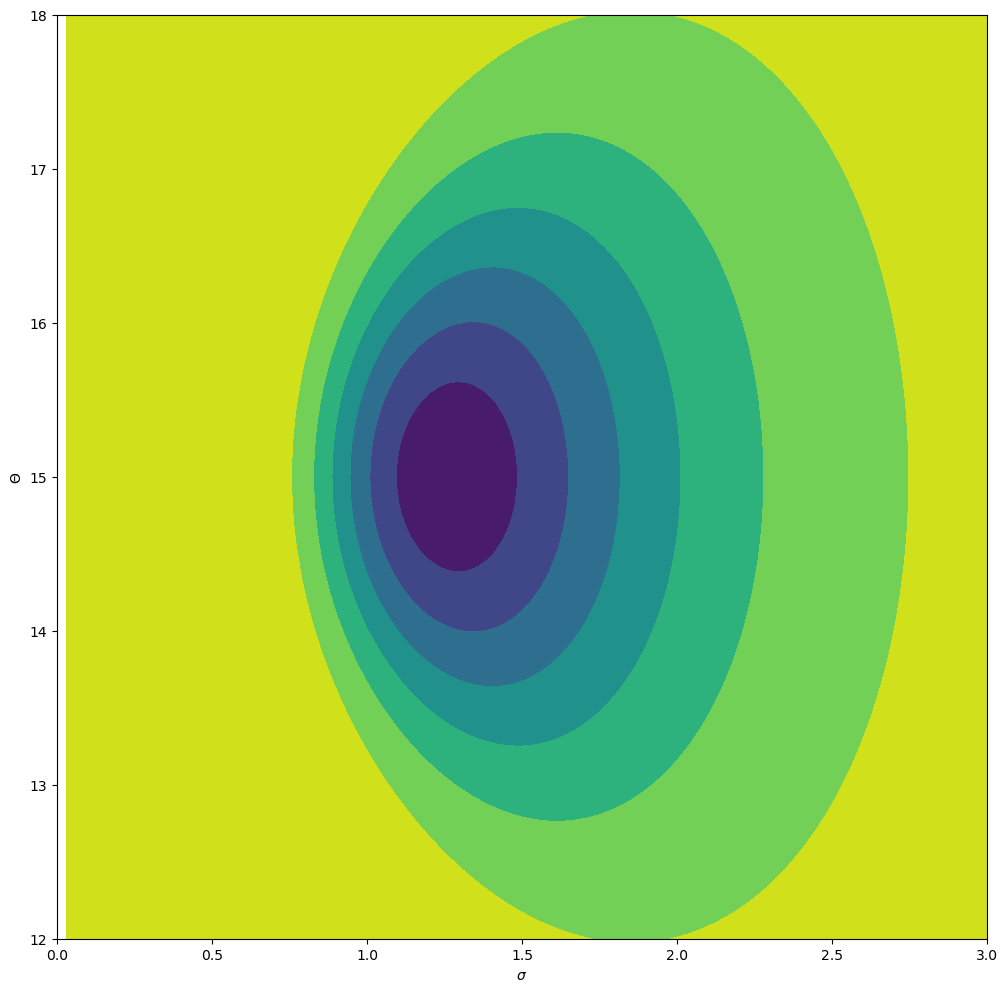

In [9]:
from scipy import stats
# Se calcula la likelihood usando una malla entre theta y sigma
theta_grid, sd_grid = np.meshgrid(np.linspace(12, 18, 101), 
                               np.linspace(0, 3, 101))

# normal ~ N(X | mu_0, sigma/sqrt(nu)) parámetros prior
logN = stats.norm.pdf(x=theta_grid, loc=mu0, scale=sd_grid/np.sqrt(kappa0))

# inv-gamma ~ IG(sigma^2 | alpha, beta)
logIG = stats.invgamma.pdf(x=sd_grid**2, a=nu0/2, scale=(nu0/2)*sigma20)

# full log-likelihood
logNIG = logN * logIG

# Se grafica la distribución normal
plt.figure(figsize=(12,12))
plt.contourf(sd_grid,theta_grid,  -logNIG)
plt.xlabel("$\sigma$")
plt.ylabel("$\Theta$")
plt.show()


En el gráfico se puede observar la distribución conjunta  de los parámetros de la distribución normal, dado un valor de la medida que se obtiene con ayuda de la distribución inverse gamma en donde se calcula el valor de sigma. El color azul indica el punto de mayor densidad entre ambos parámetros, a medida que este disminuye el color se vuelve más claro.

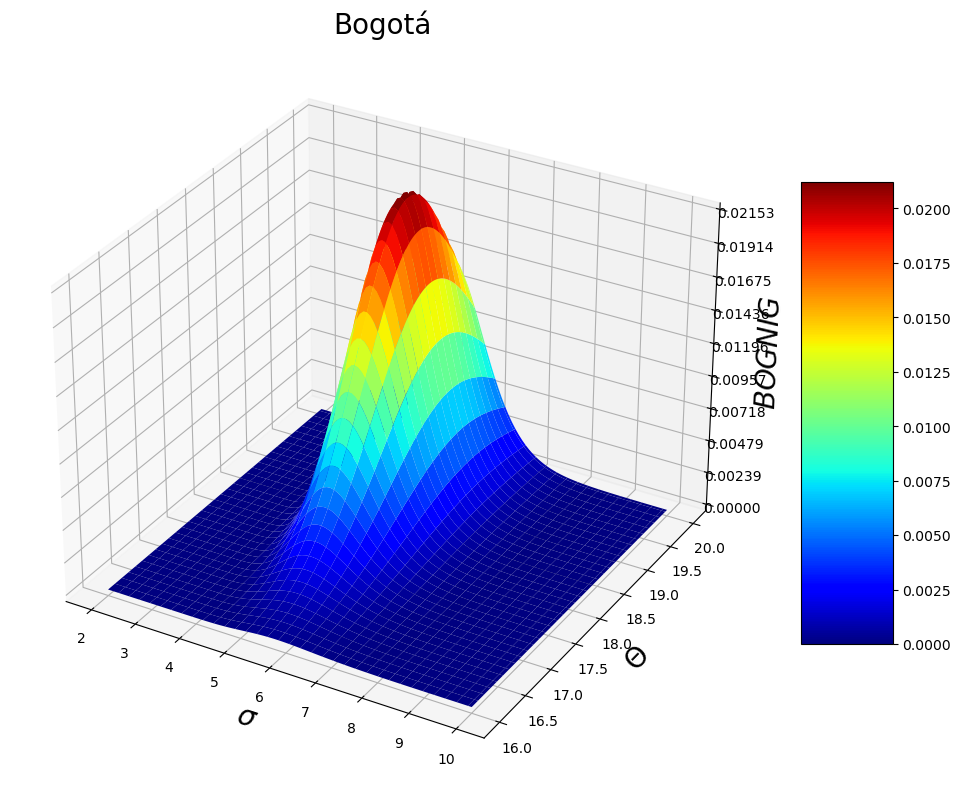

In [35]:
theta_grid, sd_grid = np.meshgrid(np.linspace(16, 20, 101), 
                               np.linspace(2, 10, 101))

# normal ~ N(X | mu_0, sigma/sqrt(nu)) parámetros posterior
NBOG = stats.norm.pdf(x=theta_grid, loc=munBOG, scale=sd_grid/np.sqrt(kappanBOG))

# inv-gamma ~ IG(sigma^2 | alpha, beta)
IGBOG = stats.invgamma.pdf(x=sd_grid**2, a=nunBOG/2 , scale=(nunBOG/2)*s2nBOG)## Observe el efecto de la varianza y 
## el tamaño de la muestra
# full log-likelihood
BOGNIG = NBOG * IGBOG
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')  # Usamos add_subplot en lugar de Axes3D

surf = ax.plot_surface(sd_grid, theta_grid, BOGNIG, cmap=cm.jet, linewidth=0.1, antialiased=True)
ax.zaxis.set_major_locator(LinearLocator(10))
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('$\sigma$', fontsize=20)
ax.set_ylabel('$\Theta$', fontsize=20)
ax.set_zlabel('$BOGNIG$', fontsize=20)  # Agrega el nombre del eje z
ax.set_title('Bogotá', fontsize=20)

plt.show()


In [36]:
mediaMED=np.mean(MED)
varMED=np.var(MED)
kappanMED= kappa0 + len(MED)
nunMED = nu0 + len(MED)
munMED=(kappa0*mu0+len(MED)*mediaMED)/kappanMED
s2nMED = (1 / nunMED) * (nu0 * sigma20 + (len(MED) - 1) * varMED + (kappa0 * len(MED) / kappanMED) * (mediaMED - mu0)**2)

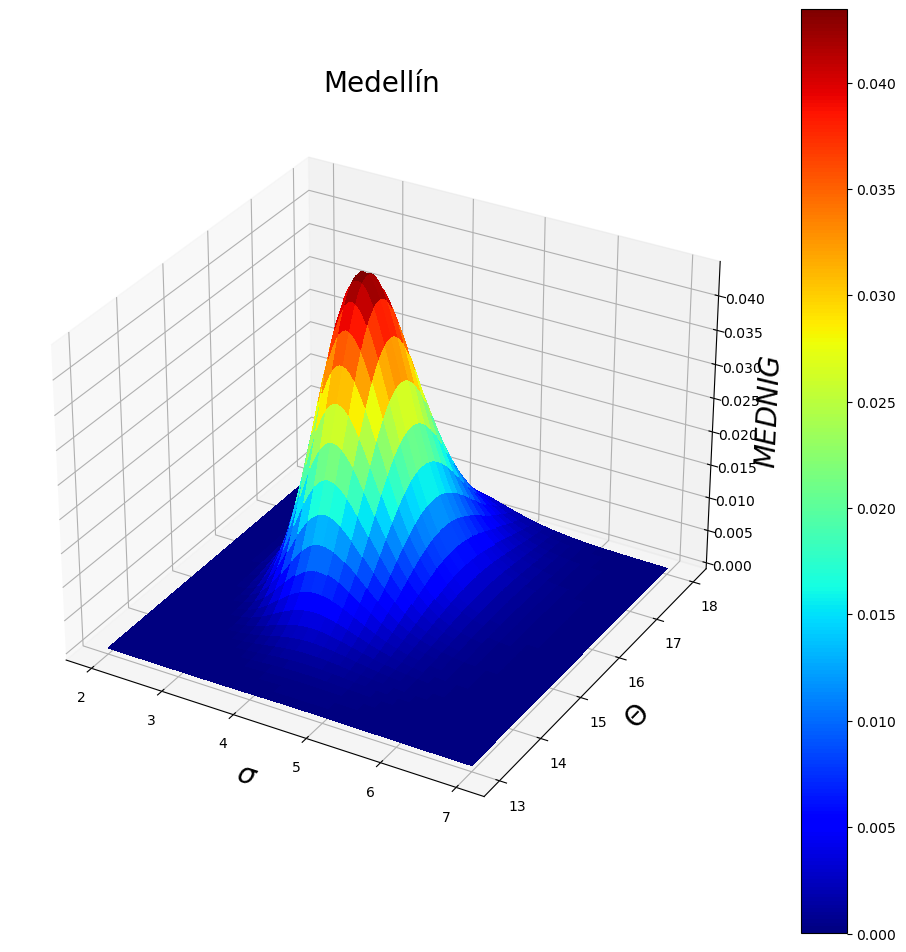

In [34]:
theta_grid, sd_grid = np.meshgrid(np.linspace(13, 18, 101), 
                               np.linspace(2, 7, 101))

# normal ~ N(X | mu_0, sigma/sqrt(nu)) parámetros posterior
NMED= stats.norm.pdf(x=theta_grid, loc=munMED, scale=sd_grid/np.sqrt(kappanMED))

# inv-gamma ~ IG(sigma^2 | alpha, beta)
IGMED = stats.invgamma.pdf(x=sd_grid**2, a=nunMED/2, scale=(nunMED/2)*s2nMED)

# full log-likelihood
MEDNIG = NMED * IGMED
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')  # Usamos add_subplot en lugar de Axes3D

surf = ax.plot_surface(sd_grid, theta_grid, MEDNIG, antialiased=False, cmap=cm.jet, linewidth=0.1)
fig.colorbar(surf)

ax.set_xlabel('$\sigma$', fontsize=20)
ax.set_ylabel('$\Theta$', fontsize=20)
ax.set_zlabel('$MEDNIG$', fontsize=20)  # Agrega el nombre del eje z
ax.set_title('Medellín', fontsize=20)

plt.show()

In [37]:
mediaCAL=np.mean(CAL)
varCAL=np.var(CAL)
kappanCAL= kappa0 + len(CAL)
nunCAL = nu0 + len(CAL)
munCAL=(kappa0*mu0+len(CAL)*mediaCAL)/kappanCAL
s2nCAL = (1 / nunCAL) * (nu0 * sigma20 + (len(CAL) - 1) * varCAL + (kappa0 * len(CAL) / kappanCAL) * (mediaCAL - mu0)**2)

Text(0.5, 0.92, 'Cali')

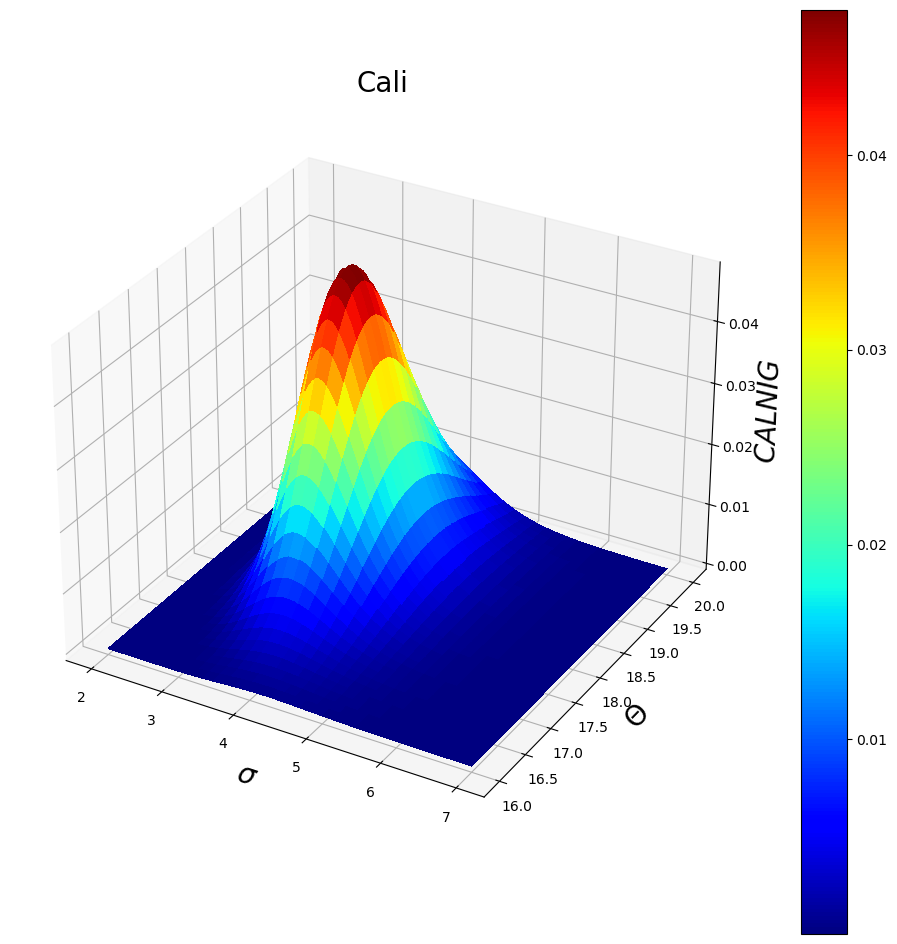

In [38]:
theta_grid, sd_grid = np.meshgrid(np.linspace(16, 20, 101), 
                               np.linspace(2, 7, 101))

# normal ~ N(X | mu_0, sigma/sqrt(nu)) parámetros posterior
NCAL = stats.norm.pdf(x=theta_grid, loc=munCAL, scale=sd_grid/np.sqrt(kappanCAL))

# inv-gamma ~ IG(sigma^2 | alpha, beta)
IGCAL = stats.invgamma.pdf(x=sd_grid**2, a=nunCAL/2 , scale=(nunCAL/2)*s2nCAL)## Observe el efecto de la varianza
 ##
# full log-likelihood
CALNIG = NCAL * IGCAL
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')  # Usamos add_subplot en lugar de Axes3D

surf = ax.plot_surface(sd_grid, theta_grid, CALNIG, cmap=cm.jet, linewidth=0.1, antialiased=False)
fig.colorbar(surf)

ax.set_xlabel('$\sigma$', fontsize=20)
ax.set_ylabel('$\Theta$', fontsize=20)
ax.set_zlabel('$CALNIG$', fontsize=20)  # Agrega el nombre del eje z
ax.set_title('Cali', fontsize=20)

In [20]:
interInfBOG=munBOG+st.norm.ppf(.025)*math.sqrt(s2nBOG/kappanBOG)
interSupBOG=munBOG+st.norm.ppf(.975)*math.sqrt(s2nBOG/kappanBOG)
interInfMED=munMED+st.norm.ppf(.025)*math.sqrt(s2nMED/kappanMED)
interSupMED=munMED+st.norm.ppf(.975)*math.sqrt(s2nMED/kappanMED)
interInfCAL=munCAL+st.norm.ppf(.025)*math.sqrt(s2nCAL/kappanCAL)
interSupCAL=munCAL+st.norm.ppf(.975)*math.sqrt(s2nCAL/kappanCAL)


data = {'Bogotá': [munBOG, s2nBOG, interInfBOG , interSupBOG,munBOG/500], 'Medellín': [munMED, s2nMED, interInfMED, interSupMED, munMED/320], 'Cali': [munCAL, s2nCAL, interInfCAL, interSupCAL, munCAL/200]}  
   
df = pd.DataFrame(data)  

df.index=["Media $\mu_{n}$"," Varianza $\sigma^{2}$", "2.5%", "97.5%", "Ocupación" ]
df


,Bogotá,Medellín,Cali
Media $\mu_{n}$,19.076923,16.136364,18.550000
Varianza $\sigma^{2}$,28.120880,15.778822,13.990892
2.5%,17.038587,14.476494,16.910710
97.5%,21.115260,17.796233,20.189290
Ocupación,0.038154,0.050426,0.092750


Cada una de las gráficas por ciudad, muestra el efecto que tiene el parámetro posterior de la varianza $\sigma^{2}$ sobre el parámetro $\theta$.  Si se compara este ejemplo con el anterior, se observa que la variabilidad de cada una de las ciudades aumenta y que el parámetro $\theta$ puede cambiar de acuerdo a las condiciones de la muestra, estos son el tamaño y la dispersión. Estos parámetros en el ejercicio anterior no tienen un efecto tan grande, porque la distribución prior contiene la información de $\sigma$ que es conocida pero que se puede ver opacada por la información que se obtiene de los datos en la distribución likelihood y que afecta solo a la media.

En esta segunda parte, la precisón del parámetro varía de acuerdo a los cambios en la dispersión de cada una de las distribuciones y se observa que los intervalos son mayores en comparación con los del anterior ejemplo cuando $\sigma^{2}$ es conocido.  


### Datos no normales.



Usualmente las observaciones presentan fuertes o pocas variaciones o tienden a tener observaciones extremas que  afectan la forma de la distribución de campana. Por lo tanto, existen algunas limitantes al implementar un modelo de distribución  normal.


En la estadística bayesiana existen algunas alternativas que se enfocan en el análisis de la varianza para poder usar estas observaciones en una distribución normal.


Aunque una muetsra pueda ser sesgada, la distribución de la media muestral tiende a distribuirse de forma normal y aplicando el teorema del límite central se puede ver que:


$$ p(\tilde{y} \mid \theta, \sigma^{2}) = N(\theta, \sigma/\sqrt{n})$$



Con una varianza conocida, la distribución posterior de la media poblacional es:

$$p(\theta \mid \tilde{y}, \sigma^{2}) \propto p(\theta)\times p(\overline{y}\mid \theta, \sigma^{2})$$

Cuando $\sigma^{2}$ no es conocida, esta se puede obtener con ayuda de $s^{2}$ que se denomina como la varianza muestral. Este proceso de inferencia parte  en la aproximación de la distribución $t$ de student y de su parámetro los grados de libertad $(n-1)$ que se usan para calcular la varianza muestral con ayuda de la distribución gamma. 


$$p(\theta, \sigma^{2} \mid \overline{y},s^{2})\propto p(\theta,\sigma^{2})\times p(\overline{y}, s^{2}\mid \theta, \sigma^{2})$$

$$p(\theta, \sigma^{2} \mid \overline{y},s^{2})\propto p(\theta,\sigma^{2})\times N(\theta,\sqrt{\sigma^{2}/n}) \times p( s^{2}\mid \overline{y}, \theta, \sigma^{2})$$

$$p( s^{2}\mid \overline{y}, \theta, \sigma^{2})=gamma(\frac{n-1}{2},\frac{n-1}{2\sigma^{2}})$$

Usando esta nueva parametrización, se pueden modelar datos que no se distribuyen de forma normal adaptandolas de acuerdo a los grados de libertad.


### Ejemplo

En el siguiente ejemplo, se creará primero una muestra que se compone de observaciones que distribuyen de forma binomial. Esta muestra es sesgada y servirá de base para obtener el parámetro $\theta$ cuando no se conoce $\sigma^{2}$ y cuando las observaciones de la muestra no se distribuyen de forma normal. 

In [21]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import random
random.seed(10)

p = 0.8
# Se genera la muestra
theta10 = list(range(10 + 1))
# se obtienen los valores de la función de probabilidad
dist10 = [binom.pmf(r, 10, p) for r in theta10 ]
theta40 = list(range(40 + 1))
dist40 = [binom.pmf(r, 40, p) for r in theta40 ]
theta80 = list(range(80 + 1))
dist80 = [binom.pmf(r, 80, p) for r in theta80 ]


Text(0.5, 1.0, 'Binomial 80')

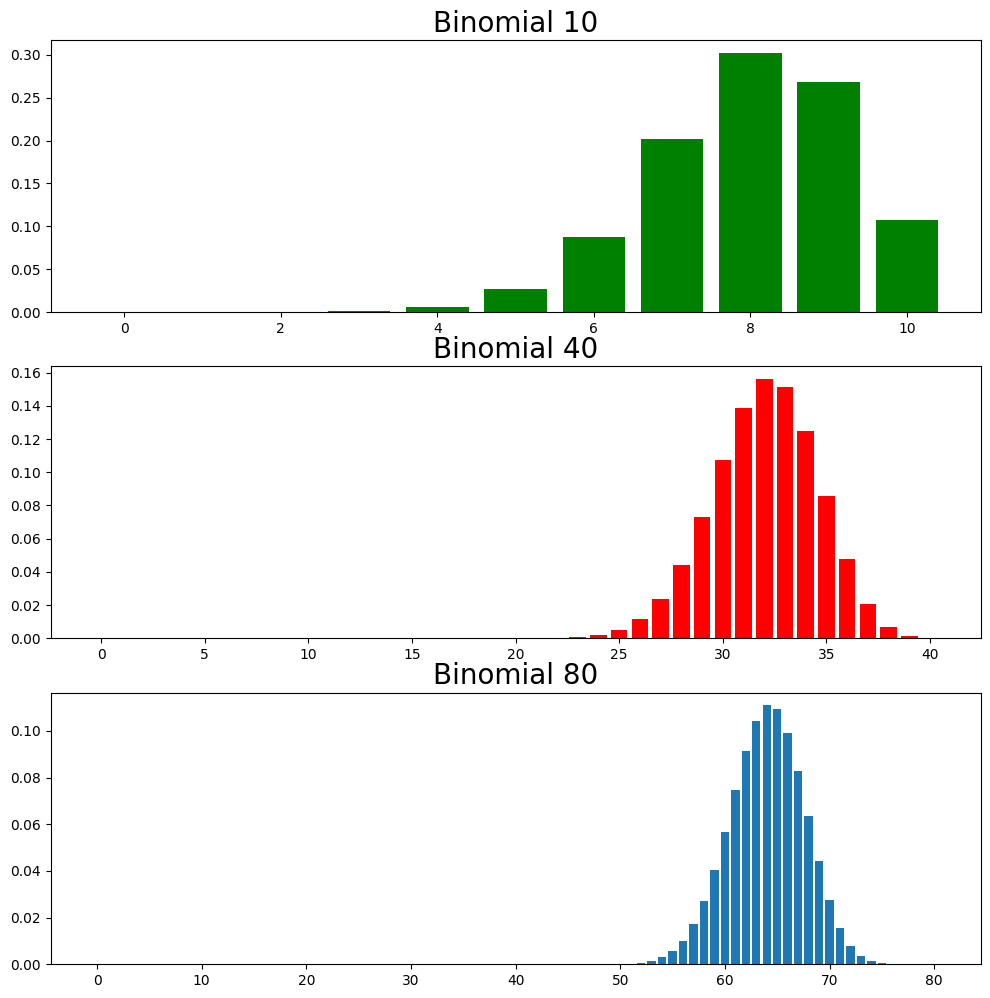

In [22]:
plt.figure(figsize=(12, 12))
plt.subplot(3, 1, 1)
plt.bar(theta10, dist10, color= "green")
plt.title("Binomial 10",fontsize=20)
plt.subplot(3, 1, 2)
plt.bar(theta40, dist40, color= "red")
plt.title("Binomial 40",fontsize=20)
plt.subplot(3, 1, 3)
plt.bar(theta80, dist80)
plt.title("Binomial 80",fontsize=20)

/Users/andresmartinez/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, '$\\overline{y}$'), Text(0, 0.5, 'Densidad')]

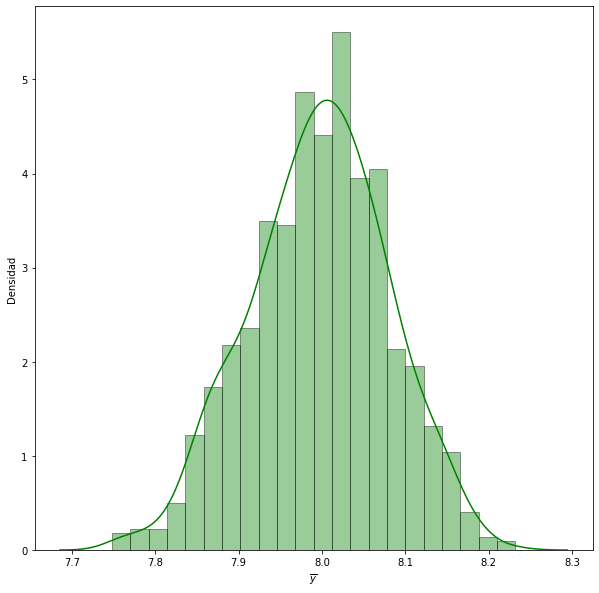

In [20]:
import numpy as np
import seaborn as sns
samples10 = np.zeros(1000)
for s in range(1000):
    sample = np.random.binomial(10, p, 250)  #sample of size 250
    x_bar = sample.mean()                      #calculating sample mean
    samples10[s] = x_bar
plt.subplots(figsize=(10,10))    
sns.distplot(samples10, hist = True, color = 'green', 
             hist_kws={'edgecolor':'black'}).set(xlabel = '$\overline{y}$', 
                                           ylabel = 'Densidad')

/Users/andresmartinez/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, '$\\overline{y}$'), Text(0, 0.5, 'Densidad')]

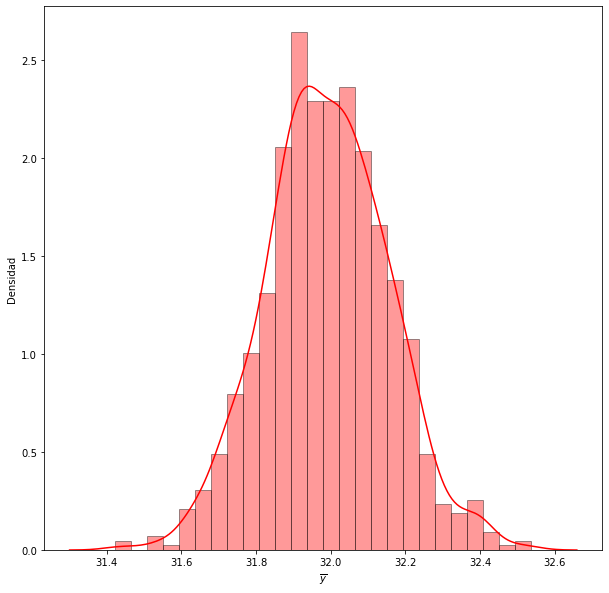

In [21]:
import numpy as np
import seaborn as sns
samples40 = np.zeros(1000)
for s in range(1000):
    sample = np.random.binomial(40, p, 250)  #sample of size 250
    x_bar = sample.mean()                      #calculating sample mean
    samples40[s] = x_bar
plt.subplots(figsize=(10,10))    
sns.distplot(samples40, hist = True, color = 'red', 
             hist_kws={'edgecolor':'black'}).set(xlabel = '$\overline{y}$', 
                                           ylabel = 'Densidad')

/Users/andresmartinez/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, '$\\overline{y}$'), Text(0, 0.5, 'Densidad')]

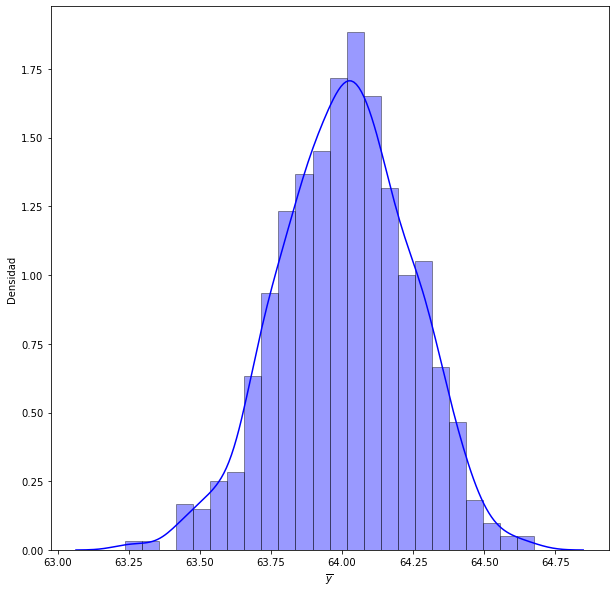

In [22]:
import numpy as np
import seaborn as sns
samples80 = np.zeros(1000)
for s in range(1000):
    sample = np.random.binomial(80, p, 250)  #sample of size 250
    x_bar = sample.mean()                      #calculating sample mean
    samples80[s] = x_bar
plt.subplots(figsize=(10,10))    
sns.distplot(samples80, hist = True, color = 'blue', 
             hist_kws={'edgecolor':'black'}).set(xlabel = '$\overline{y}$', 
                                           ylabel = 'Densidad')

Como se observa en las tres figuras $\overline{y}$ tiene una distribución normal sin importar el tamaño de la muestra y que tan sesgado se encuentra.

Ahora se calcularrá la distribución posterior para datos no normales con la variación en los parámetros de la distribución gamma y usando la distribución de la media muestral. En este caso lo parámetros prior son $\mu_{0}=10$, $\kappa_{0}=1$, $\sigma^{2}_{0}=2$, $\nu_{0}=2$

In [23]:
mu0=10
kappa0=1
nu0=2
sigma20=2
mediadist10=np.mean(dist10)
vardist10=np.var(dist10)
kappandist10= kappa0 + len(dist10)
nundist10 = nu0 + len(dist10)
mundist10=(kappa0*mu0+len(dist10)*mediadist10)/kappandist10
s2ndist10 = (1 / nundist10) * (nu0 * sigma20 + (len(dist10) - 1) * vardist10 + (kappa0 * len(dist10) / kappandist10) * (mediadist10 - mu0)**2)

In [24]:
mediadist40=np.mean(dist40)
vardist40=np.var(dist40)
kappandist40= kappa0 + len(dist40)
nundist40 = nu0 + len(dist40)
mundist40=(kappa0*mu0+len(dist40)*mediadist40)/kappandist40
s2ndist40 = (1 / nundist40) * (nu0 * sigma20 + (len(dist40) - 1) * vardist40 + (kappa0 * len(dist40) / kappandist40) * (mediadist40 - mu0)**2)

In [25]:
mediadist80=np.mean(dist80)
vardist80=np.var(dist80)
kappandist80= kappa0 + len(dist80)
nundist80 = nu0 + len(dist80)
mundist80=(kappa0*mu0+len(dist80)*mediadist80)/kappandist80
s2ndist80 = (1 / nundist80) * (nu0 * sigma20 + (len(dist80) - 1) * vardist80 + (kappa0 * len(dist80) / kappandist80) * (mediadist80 - mu0)**2)

In [62]:
from scipy.stats.contingency import margins
df=len(dist10)-1
desv=np.sqrt(p*(1-p)/10)
theta_grid, sd_grid = np.meshgrid(np.linspace(0, 40, 101), np.linspace(0, 1.26, 101))
# normal ~ N(X | mu_0, sigma/sqrt(nu)) parámetros posterior
NDIST10 = stats.norm.pdf(x=theta_grid, loc=mundist10, scale=sd_grid/np.sqrt(kappandist10))
# normal ~ N(X | mu_0, sigma/sqrt(sigma2)) parámetros posterior
DIST10 = stats.norm.pdf(x=theta_grid, loc=p, scale=desv)
# inv-gamma ~ IG(sigma^2 | alpha, beta)
IGDIST10 = stats.invgamma.pdf(x=sd_grid**2, a=df/2 , scale=df/(2*s2ndist10))
# full log-likelihood
NIGDIST10 = NDIST10* DIST10 * IGDIST10
dist10marg=margins(NIGDIST10)
dist10marg=dist10marg[0 ]


/Users/andresmartinez/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1835: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


In [63]:
df=len(dist40)-1
desv=np.sqrt(p*(1-p)/40)
theta_grid, sd_grid = np.meshgrid(np.linspace(0, 40, 101), np.linspace(0,2.52 , 101))
# normal ~ N(X | mu_0, sigma/sqrt(nu)) parámetros posterior
NDIST40 = stats.norm.pdf(x=theta_grid, loc=mundist40, scale=sd_grid/np.sqrt(kappandist40))

# normal ~ N(X | mu_0, sigma/sqrt(sigma2)) parámetros posterior

DIST40 = stats.norm.pdf(x=theta_grid, loc=p, scale=desv)

# inv-gamma ~ IG(sigma^2 | alpha, beta)
IGDIST40 = stats.invgamma.pdf(x=sd_grid**2, a=df/2 , scale=df/(2*s2ndist40))## Observe el efecto de la varianza
 ##
# full log-likelihood
NIGDIST40 = NDIST40 * DIST40 *IGDIST40
dist40marg=margins(NIGDIST40)
dist40marg=dist40marg[0 ]


In [64]:
df=len(dist80)-1
desv=np.sqrt(p*(1-p)/80)
theta_grid, sd_grid = np.meshgrid(np.linspace(0, 40, 101), np.linspace(0, 3.6, 101))
# normal ~ N(X | mu_0, sigma/sqrt(nu)) parámetros posterior
NDIST80 = stats.norm.pdf(x=theta_grid, loc=mundist80, scale=sd_grid/np.sqrt(kappandist80))


# normal ~ N(X | mu_0, sigma/sqrt(sigma2)) parámetros posterior

DIST80 = stats.norm.pdf(x=theta_grid, loc=p, scale=desv)

# inv-gamma ~ IG(sigma^2 | alpha, beta)
IGDIST80 = stats.invgamma.pdf(x=sd_grid**2, a=df/2 , scale=df/(2*s2ndist80))## Observe el efecto de la varianza
 ##
# full log-likelihood
NIGDIST80 = NDIST80 * DIST80 *IGDIST80
dist80marg=margins(NIGDIST80)
dist80marg=dist80marg[0 ]


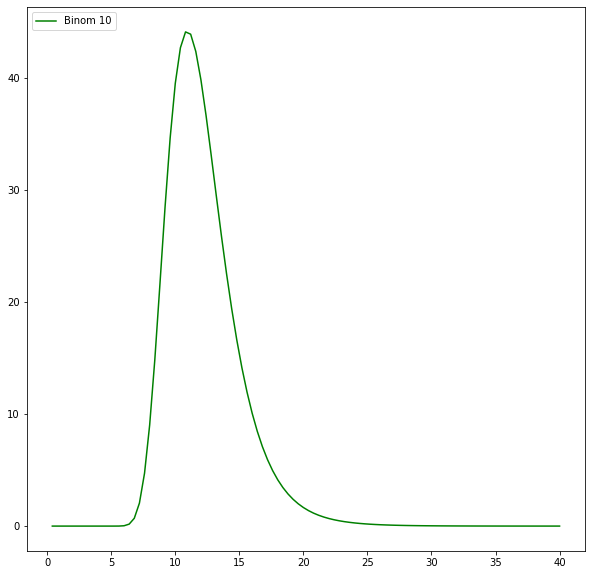

In [65]:
theta = np.linspace(0, 40, 101) 
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(theta,dist10marg, color = 'green', label = 'Binom 10')
ax.legend(loc = 'upper left')

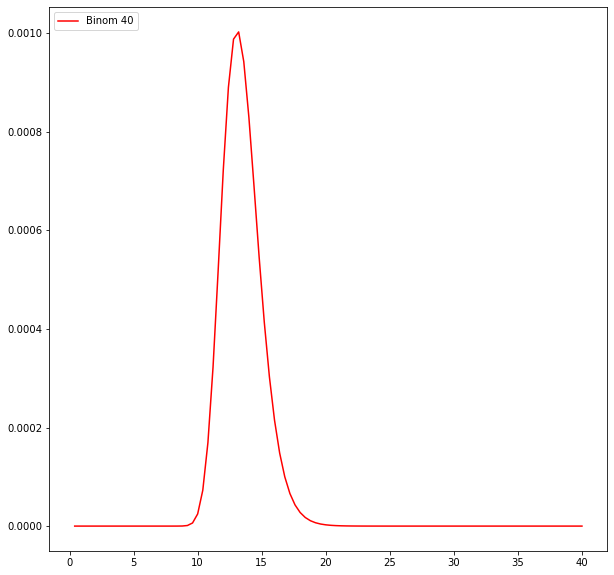

In [61]:
theta = np.linspace(0, 40, 101) 
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(theta,dist40marg, color = 'red', label = 'Binom 40')
ax.legend(loc = 'upper left')

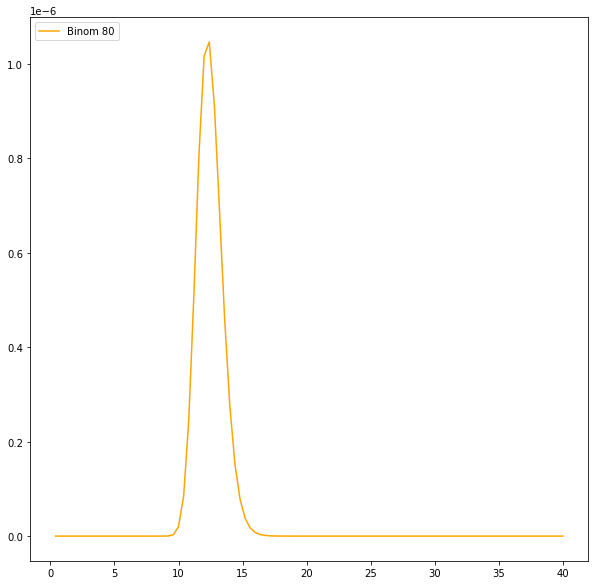

In [53]:
theta = np.linspace(0, 40, 101) 
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(theta,dist80marg, color = 'orange', label = 'Binom 80')
ax.legend(loc = 'upper left')

La última figura presenta los tres ejemplos de una distribución normal posterior para $n=10,40,80$ se observa como a medida que aumenta la muestra,  el error en la estimación de la media disminuye. Este proceso de inferencia se realiza asumiendo como parámetro  $n-1$ grados de libertad  como parte de la forma la distribución gamma que proviene de la relación de la dustribución normal y la distribución $t$ de student.